In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

In [55]:
train_values = pd.read_csv('data/training_set_values.csv')
train_labels = pd.read_csv('data/training_set_labels.csv')

In [56]:
df_train = train_values.merge(train_labels, on='id', how='inner')
df_train.shape

(59400, 41)

In [57]:
df_test = pd.read_csv('data/test_set_values.csv')
df_test.shape

(14850, 40)

In [58]:
df_train.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [59]:
#longtitude temporarily droped
#Temporarily keep subvillage, num_private date_recorded
df_train = df_train.drop(columns = ['lga','ward','region_code', 'district_code','wpt_name','scheme_name','extraction_type','extraction_type_group','management','payment','quality_group','quantity_group','source_type','source','waterpoint_type'])
df_test = df_test.drop(columns = ['lga','ward','region_code', 'district_code','wpt_name','scheme_name','extraction_type','extraction_type_group','management','payment','quality_group','quantity_group','source_type','source','waterpoint_type'])


In [60]:
df_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'num_private', 'basin',
       'subvillage', 'region', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity', 'source_class', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [61]:
df_train.shape

(59400, 26)

In [62]:
df_test.shape

(14850, 25)

In [63]:
df_train.apply(lambda x: sum(x.isnull()))

id                          0
amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
installer                3655
longitude                   0
latitude                    0
num_private                 0
basin                       0
subvillage                371
region                      0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_class       0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source_class                0
waterpoint_type_group       0
status_group                0
dtype: int64

### From here, if in test dataset, the value of variables below is not belong to any known class, then set it to 'unknown'

In [64]:
df_train['funder'] = df_train['funder'].fillna('unknown')
df_test['funder'] = df_test['funder'].fillna('unknown')

In [65]:
df_train['installer'] = df_train['installer'].fillna('unknown')
df_test['installer'] = df_test['installer'].fillna('unknown')

In [66]:
df_train['subvillage'] = df_train['subvillage'].fillna('unknown')
df_test['subvillage'] = df_test['subvillage'].fillna('unknown')

In [67]:
df_train['scheme_management'] = df_train['scheme_management'].fillna('unknown')
df_test['scheme_management'] = df_test['scheme_management'].fillna('unknown')

In [68]:
df_train['permit'] = df_train['permit'].fillna('unknown')
df_test['permit'] = df_test['permit'].fillna('unknown')

### convert 0 to nan

In [69]:
df_train['construction_year'] = df_train['construction_year'].replace( {0:np.nan})
df_test['construction_year'] = df_test['construction_year'].replace( {0:np.nan})

calculate existing year of each well

In [70]:
df_train['date_recorded'] = df_train['date_recorded'].map(lambda x: pd.to_datetime(x).year)-df_train['construction_year']
df_train.rename(columns = {'date_recorded':'existing year'}, inplace=True)
df_test['date_recorded'] = df_test['date_recorded'].map(lambda x: pd.to_datetime(x).year)-df_test['construction_year']
df_test.rename(columns = {'date_recorded':'existing year'}, inplace=True)

In [71]:
df_train['existing year'].head(5)

0    12.0
1     3.0
2     4.0
3    27.0
4     NaN
Name: existing year, dtype: float64

In [72]:
df_train['existing year'] = df_train['existing year'].fillna('unknown')
df_test['existing year'] = df_test['existing year'].fillna('unknown')

### drop construction_year

In [73]:
df_train = df_train.drop(columns = ['construction_year'])
df_test = df_test.drop(columns = ['construction_year'])

In [74]:
df_train.shape

(59400, 25)

In [75]:
df_test.shape

(14850, 24)

In [76]:
df_train.apply(lambda x: sum(x.isnull()))

id                          0
amount_tsh                  0
existing year               0
funder                      0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
num_private                 0
basin                       0
subvillage                  0
region                      0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management           0
permit                      0
extraction_type_class       0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source_class                0
waterpoint_type_group       0
status_group                0
dtype: int64

In [77]:
df_train['quantity'][:10]

0          enough
1    insufficient
2          enough
3             dry
4        seasonal
5          enough
6          enough
7          enough
8        seasonal
9          enough
Name: quantity, dtype: object

### test the relationship between 'quantity' and 'amount_tsh' and to see whether the 'amount_tsh' is decided by 'quantity' in some extent

In [78]:
df_train['amount_tsh'].value_counts()

0.00         41639
500.00        3102
50.00         2472
1000.00       1488
20.00         1463
200.00        1220
100.00         816
10.00          806
30.00          743
2000.00        704
250.00         569
300.00         557
5000.00        450
5.00           376
25.00          356
3000.00        334
1200.00        267
1500.00        197
6.00           190
600.00         176
4000.00        156
2400.00        145
2500.00        139
6000.00        125
7.00            69
8000.00         61
750.00          59
40.00           59
10000.00        57
12000.00        51
             ...  
16000.00         2
16300.00         2
800.00           2
11000.00         2
590.00           2
520.00           2
26000.00         2
13000.00         2
9.00             1
170000.00        1
200000.00        1
900.00           1
0.25             1
53.00            1
350000.00        1
306.00           1
120000.00        1
26.00            1
59.00            1
60000.00         1
5400.00          1
70000.00    

In [79]:
df_train['amount_tsh'].describe()
#so 'amount_tsh' is mainly below 20

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [80]:
df_train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [81]:
df_train[df_train['amount_tsh']==0]['quantity'].value_counts(normalize=True)

enough          0.506809
insufficient    0.262110
dry             0.132472
seasonal        0.081918
unknown         0.016691
Name: quantity, dtype: float64

In [82]:
df_train[(df_train['amount_tsh']<=20) & (df_train['amount_tsh']>0)]['quantity'].value_counts(normalize=True)

enough          0.646379
insufficient    0.272016
seasonal        0.048963
dry             0.027542
unknown         0.005100
Name: quantity, dtype: float64

In [83]:
df_train[df_train['amount_tsh']>20]['quantity'].value_counts(normalize=True)

enough          0.687045
insufficient    0.230432
dry             0.043792
seasonal        0.033401
unknown         0.005331
Name: quantity, dtype: float64

### according to above, 'amount_tsh'>20 is in the similar percentage with 0<'amount_tsh'<=20(then to think about the figure below,why it is skew) Therefore, there are 2 conclusions. 1. 'amount_tsh' represents overall amount of water not per person. 2. 'quantity' is for per person. Using 'quantity' is more reasonable. 

In [84]:
df_train = df_train.drop(columns = ['amount_tsh'])
df_test = df_test.drop(columns = ['amount_tsh'])

#### so many funders and installers. therefore convert them into few clusters( only keep the clusters corresponding to larger number).

In [85]:
df_train['funder'].value_counts()

Government Of Tanzania         9084
unknown                        3635
Danida                         3114
Hesawa                         2202
Rwssp                          1374
World Bank                     1349
Kkkt                           1287
World Vision                   1246
Unicef                         1057
Tasaf                           877
District Council                843
Dhv                             829
Private Individual              826
Dwsp                            811
0                               777
Norad                           765
Germany Republi                 610
Tcrs                            602
Ministry Of Water               590
Water                           583
Dwe                             484
Netherlands                     470
Hifab                           450
Adb                             448
Lga                             442
Amref                           425
Fini Water                      393
Oxfam                       

In [86]:
df_train['installer'].value_counts()

DWE                           17402
unknown                        3656
Government                     1825
RWE                            1206
Commu                          1060
DANIDA                         1050
KKKT                            898
Hesawa                          840
0                               777
TCRS                            707
Central government              622
CES                             610
Community                       553
DANID                           552
District Council                551
HESAWA                          539
World vision                    408
LGA                             408
WEDECO                          397
TASAF                           396
District council                392
Gover                           383
AMREF                           329
TWESA                           316
WU                              301
Dmdd                            287
ACRA                            278
World Vision                

In [87]:
df_train[df_train['installer']=='DWE']['funder'].value_counts()

Government Of Tanzania            4254
Hesawa                            1296
Rwssp                              914
Dhv                                678
Danida                             626
Dwsp                               616
Unicef                             562
Netherlands                        463
Dwe                                450
Adb                                368
Tasaf                              281
Rural Water Supply And Sanitat     266
Ces(gmbh)                          260
Ministry Of Water                  232
District Council                   213
Isf                                178
World Vision                       175
Rudep                              172
Norad                              167
Ces (gmbh)                         165
Mission                            160
World Bank                         152
Mkinga Distric Coun                149
Concern World Wide                 145
Water                              137
Snv                      

### from above, 'funder' could be regarded as the clusters of the 'installer'. delete 'funder' only keep 'installer' Besides, some installer names are equal to funder names

In [88]:
df_train = df_train.drop(columns = ['funder'])
df_test = df_test.drop(columns = ['funder'])

In [89]:
import re
def installer_cleaning(df):
    data = str(df['installer']).lower()
    pattern1 = 'gove.+'
    pattern2 = 'comm.+'
    pattern3 = 'priv.+'
    pattern4 = 'repub.+' # republic
    pattern5 = 'minis.+' # minist
    pattern6 = 'world.+' # big name 
    pattern7 = 'chur.+' # church
    pattern8 = 'coun.+' # council
    pattern9 = 'wate.+' # water: big name 
    pattern10 = 'dani.+' # church
    pattern7 = 'chur.+' # church
    if(re.search(pattern1, data)):
        return "government"
#         return data
    elif(re.search(pattern2, data)):
        return "community"
    elif(re.search(pattern3, data)):
        return 'individual'
    elif(re.search(pattern4, data)):
        return "government" # republic
    elif(re.search(pattern5, data)):
        return "government" # ministry 
    elif(re.search(pattern6, data)):
        return "community" # world bank, vision 
    elif(re.search(pattern7, data)):
        return "community" # church 
    elif(re.search(pattern8, data)):
        return "government" # council 
    elif(re.search(pattern9, data)):
        return "community" # water as a big name 
    elif(re.search(pattern10, data)):
        return "danida" # danida as a top name 
    elif(data=='nan' or data=='0'):
        return "unknown" # danida as a top name 
    elif(data=='dwe'):
        return 'dwe'
    elif(data=='hesawa'):
        return 'hesawa'
    elif(data=='rwe'):
        return 'rwe'
    elif(data=='kkkt'):
        return 'kkkt'
    elif(data=='tcrs'):
        return 'tcrs'
    elif(data=='ces'):
        return 'ces'
#         return data
    else:
        return "other"
#         return data
# df_train['funder'] = df_train.apply(lambda row: funder_cleaning(row), axis=1)
d_inst = df_train.apply(lambda row: installer_cleaning(row), axis=1)
d_inst.value_counts()

other         24512
dwe           17405
community      5436
government     4541
danida         1678
hesawa         1395
rwe            1206
kkkt            910
unknown         777
tcrs            707
ces             610
individual      223
dtype: int64

In [90]:
df_train['installer']=d_inst
df_test['installer'] = df_test.apply(lambda row: installer_cleaning(row), axis=1)

Text(0.5, 1.0, 'Distribution of population')

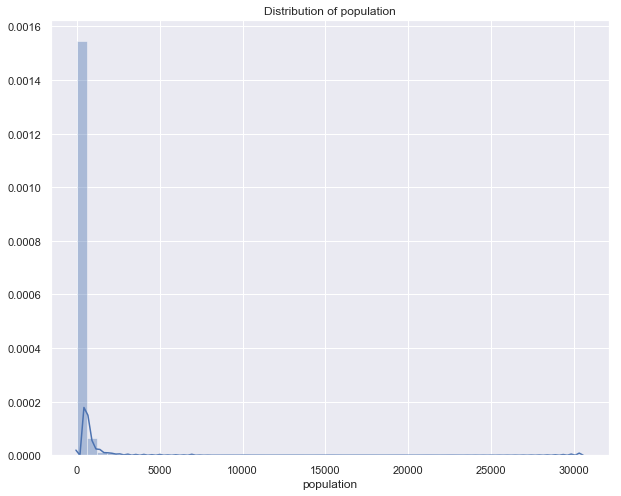

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.distplot(df_train['population'])
ax.set_title('Distribution of population')# skewness may be caused by zero,try next

In [92]:
df_train['population'] = df_train['population'].replace( {0:np.nan})#population cannot be 0 so it might be missing value

In [93]:
df_train['population'].value_counts().head(10)

1.0      7025
200.0    1940
150.0    1892
250.0    1681
300.0    1476
100.0    1146
50.0     1139
500.0    1009
350.0     986
120.0     916
Name: population, dtype: int64

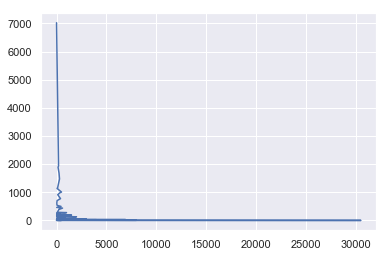

In [116]:
# plt.plot(df_train['population'].value_counts())#still skew (need some other methods) also means '0' perhaps not mean NaN

In [94]:
df_train['population'] = df_train['population'].replace( {np.nan:np.zeros})
df_test['population'] = df_test['population'].replace( {np.nan:np.zeros})

In [95]:
df_train.apply(lambda x: sum(x.isnull()))


id                          0
existing year               0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
num_private                 0
basin                       0
subvillage                  0
region                      0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management           0
permit                      0
extraction_type_class       0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source_class                0
waterpoint_type_group       0
status_group                0
dtype: int64

In [96]:
df_test.apply(lambda x: sum(x.isnull()))

id                         0
existing year              0
gps_height                 0
installer                  0
longitude                  0
latitude                   0
num_private                0
basin                      0
subvillage                 0
region                     0
population                 0
public_meeting           821
recorded_by                0
scheme_management          0
permit                     0
extraction_type_class      0
management_group           0
payment_type               0
water_quality              0
quantity                   0
source_class               0
waterpoint_type_group      0
dtype: int64

### have no idea what 'public meeting' is

In [97]:
df_train['public_meeting'] = df_train['public_meeting'].fillna('unknown')
df_test['public_meeting'] = df_test['public_meeting'].fillna('unknown')

#### longtitude and latitude is enough for location

In [ ]:
df_train = df_train.drop(columns = ['subvillage'])
df_test = df_test.drop(columns = ['subvillage'])

In [103]:
df_train = df_train.drop(columns = ['recorded_by'])#not useful
df_test = df_test.drop(columns = ['recorded_by'])

In [105]:
df_train.to_csv('data/trainset_clean1.csv', index=False)
df_test.to_csv('data/testset_clean1.csv', index=False)

In [111]:
df_train.columns

Index(['id', 'existing year', 'gps_height', 'installer', 'longitude',
       'latitude', 'num_private', 'basin', 'region', 'population',
       'public_meeting', 'scheme_management', 'permit',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity', 'source_class', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [112]:
dummy_cols = ['installer', 'basin', 'region', 'public_meeting',
       'scheme_management', 'permit',
       'extraction_type_class', 'management_group', 'payment_type',
       'water_quality', 'quantity', 'source_class', 'waterpoint_type_group']

In [113]:
df_train_dummy = pd.get_dummies(df_train, columns = dummy_cols)
df_test_dummy = pd.get_dummies(df_test, columns = dummy_cols)

In [114]:
df_train_dummy.head()

,id,existing year,gps_height,longitude,latitude,num_private,population,status_group,installer_ces,installer_community,...,quantity_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,12,1390,34.938093,-9.856322,0,109,functional,0,0,...,0,1,0,0,0,1,0,0,0,0
1,8776,3,1399,34.698766,-2.147466,0,280,functional,0,0,...,0,0,1,0,0,1,0,0,0,0
2,34310,4,686,37.460664,-3.821329,0,250,functional,0,1,...,0,0,1,0,0,1,0,0,0,0
3,67743,27,263,38.486161,-11.155298,0,58,non functional,0,0,...,0,1,0,0,0,1,0,0,0,0
4,19728,unknown,0,31.130847,-1.825359,0,<built-in function zeros>,functional,0,0,...,0,0,1,0,0,1,0,0,0,0


In [115]:
df_train_dummy.to_csv('data/trainset_clean_dummy.csv', index=False)
df_test_dummy.to_csv('data/testset_clean_dummy.csv', index=False)